In [1]:
from os import path


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

# Authenticate and create PyDrive client
gauth = GoogleAuth()
gauth.LoadClientConfigFile("E:\\client_secrets.json")  # Replace with the actual path
gauth.LocalWebserverAuth() # Opens a browser window to authenticate

drive = GoogleDrive(gauth)

# Mounted successfully
print("Google Drive mounted successfully!")



Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=1000898488803-562tqrksdjltgq25aqnm3030ugbci1au.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.
Google Drive mounted successfully!


In [10]:
# List files in the root directory of Google Drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

# Search for the 'datasets' directory
datasets_folder_id = None
for file in file_list:
    if file['title'] == 'Data Science Projects' and file['mimeType'] == 'application/vnd.google-apps.folder':
        datasets_folder_id = file['id']
        break

if datasets_folder_id:
    print("Found 'datasets' folder with ID:", datasets_folder_id)
else:
    print("Could not find 'datasets' folder.")


Found 'datasets' folder with ID: 1wwCg9_hX3M8-2_gVrcBpx-9J8tZlqdSi


In [8]:
# List files in the 'Data Science Projects' folder using its ID
folder_id = '1wwCg9_hX3M8-2_gVrcBpx-9J8tZlqdSi'
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
for file in file_list:
    print('Title: {}, ID: {}'.format(file['title'], file['id']))


Title: Music Recommendation System, ID: 1NeZyebA8SgreCoaDEgHNXQfXNQRlLQEE
Title: Traffic Sign Recognition, ID: 1U9i8tAv7gXrINsC5oOrW3FiHZADWXr41
Title: Fine tune LLM, ID: 1pgKcZrK2WV8pm4AYr6iOhWg_Gvxn6BZ7
Title: BCGX, ID: 1FPtEQ2eE00cx7OJTRHwmbVgDBD7db4BK
Title: Cognizant, ID: 1AR5mwzQOBXO9Mot0nmi_pceJXKJqU5se
Title: Spam Comments Detection in Youtube, ID: 1EXxZJninqYJjXOF4zDzsC1WfuB9qcmQ2
Title: House Prices Prediction, ID: 1FZUM034QWczwylsvh8c8xmOnqVlNAd_A
Title: Emotion Detection, ID: 1WCmgmmpQgjhApleBOBuVSMkgkpYiSq71


In [12]:
def get_folder_id(parent_id, folder_name):
    query = f"'{parent_id}' in parents and trashed=false and mimeType='application/vnd.google-apps.folder' and title='{folder_name}'"
    file_list = drive.ListFile({'q': query}).GetList()
    if file_list:
        return file_list[0]['id']
    else:
        print(f"Folder '{folder_name}' not found.")
        return None

# Step 1: Get 'Traffic Sign Recognition' folder ID inside 'Data Science Projects'
data_science_projects_id = '1wwCg9_hX3M8-2_gVrcBpx-9J8tZlqdSi'  # Use the previously obtained ID
traffic_sign_recognition_id = get_folder_id(data_science_projects_id, 'Traffic Sign Recognition')

# Step 2: Get 'data' folder ID inside 'Traffic Sign Recognition'
if traffic_sign_recognition_id:
    data_folder_id = get_folder_id(traffic_sign_recognition_id, 'data')

# Step 3: Get 'myData' folder ID inside 'data'
if data_folder_id:
    my_data_folder_id = get_folder_id(data_folder_id, 'myData')

# Step 4: List files in 'myData' folder and use as dataset path
if my_data_folder_id:
    file_list = drive.ListFile({'q': f"'{my_data_folder_id}' in parents and trashed=false"}).GetList()
    for file in file_list:
        print('Title: {}, ID: {}'.format(file['title'], file['id']))

    # Example usage in dataset creation function
    # Here you should include your dataset creation code using the files in the 'myData' folder
    # For demonstration, I'm printing file titles
    dataset_files = [file['title'] for file in file_list]
    print("Dataset files:", dataset_files)
else:
    print("Could not navigate to 'myData' folder.")

Title: 9, ID: 1QyWu8YfFwJt73w93hYIAv27Cveqy1LRZ
Title: 8, ID: 1RAkX9_iBlaDYziV6DV9eS8LJ98CXKS9L
Title: 7, ID: 1QAfhgBmaSaeZ4hUwIw47Jdsdjfj5xBeR
Title: 6, ID: 1QC1HS9si3xd8J6piWqenKH8p7jE6fkJg
Title: 5, ID: 1QCanxaVuOl6JRilSDVkC0jreH-pIjWBu
Title: 42, ID: 1QEgbLDod_8NIbklLP_Lbp5wGWwSQG3ky
Title: 41, ID: 1QF6gxkOnG9Xlekpu4SHKPzf1BOPntVJY
Title: 40, ID: 1QOEy4NGqiVkIn-C_pKoECD3wVwmPRpS6
Title: 4, ID: 1QOeoH-wZul7yDzBiPbHKY4yllQ4c_qcF
Title: 39, ID: 1QZg0XUVcjBVFHkXM5hHA4Lb12Tx6Tuxo
Title: 38, ID: 1QczCFNNmQgcf2-a98Uy0HarPKQ285FGi
Title: 37, ID: 1QgGXNm1taNJ-e0slidP812zjLrJtMXb6
Title: 36, ID: 1QoBhgNjofE0NZu91aDMh354OS1Qq2vO6
Title: 35, ID: 1Qr1J7NvYAmqW_OWrX-s8sBCPAQq6fm1q
Title: 34, ID: 1Qtsbaalh1W6LNm6G6TDkzt_9lpoy8hZd
Title: 33, ID: 1QuOAC01APRWGb5MTl3Z_2bUMsnUdDerV
Title: 32, ID: 1Mu0tW8KwXkFiqdR-actj8A---oYNrG6y
Title: 31, ID: 1MvnfZv0kcHu7CYkrPKcCpgg3r5HLUvd7
Title: 30, ID: 1MxxsWmFApB4oliLuP5BpTFZTO94fONWP
Title: 3, ID: 1Mywdzrewso1e958YLjDqE-nx2AFWIW5M
Title: 29, ID: 1MzJzgZVFEeq

In [ ]:
# import zipfile
# import os

# zip_file_path = "archive (3).zip"
# extract_dir = "data"

# if not os.path.exists(extract_dir):
#     os.makedirs(extract_dir)

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print("unzipping done!")




# ***Steps to be followed***




1.Load and Visualize Data

2.Data Preparation for Training



3.Data Augmentation

4.Model Architecture

5.Compile and Train the Model

6.Model Evaluation

# **Step 1 - Load and Visualize Data**

Is TensorFlow built with GPU support?  False
Num GPUs Available:  0
No GPU found. Please check the runtime settings.


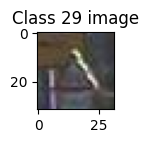

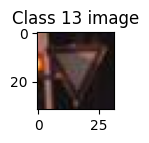

The label for class 29 is: Bicycles crossing
The label for class 13 is: Yield


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2   #module of the opencv library
import os

# Check if TensorFlow is built with GPU support
print("Is TensorFlow built with GPU support? ", tf.test.is_built_with_cuda())

# List available GPUs
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Details about the GPU
if tf.config.list_physical_devices('GPU'):
    gpu_details = tf.config.experimental.get_device_details(tf.config.list_physical_devices('GPU')[0])
    print("GPU details: ", gpu_details)
else:
    print("No GPU found. Please check the runtime settings.")

#Path to the dataset folder
dataset_path = "D://drive/Training Data"
labels_file_path = "D://drive/Training Data/labels.csv"

#load the label file
labels_df = pd.read_csv(labels_file_path)

#Visualize some images
plt.figure(figsize=(1, 1))
img1 = cv2.imread(os.path.join(dataset_path, "29/00000_00000.jpg"))  #Read an image from file
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  #color conversion of image for proper display with matplotlib
plt.title('Class 29 image')
plt.show()

plt.figure(figsize=(1, 1))
img2 = cv2.imread(os.path.join(dataset_path, "13/00000_00000.jpg"))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Class 13 image')
plt.show()

# print(labels_df.head())
# print(labels_df.tail())


# Function to get the label of a certain image class

def get_label(class_id):
    label_row = labels_df[labels_df['ClassId'] == class_id]
    if not label_row.empty:
        label_name = label_row.iloc[0]['Name']
        return label_name
    else:
        return "Label not found"

# Example: Get the label for class 29
class_id = 29
label = get_label(class_id)
print(f'The label for class {class_id} is: {label}')

# Example: Get the label for class 13
class_id = 13
label = get_label(class_id)
print(f'The label for class {class_id} is: {label}')



# **Step 2 - Data Preperation for Training**

Found 73139 files belonging to 43 classes.
Using 58512 files for training.
Found 73139 files belonging to 43 classes.
Using 14627 files for validation.


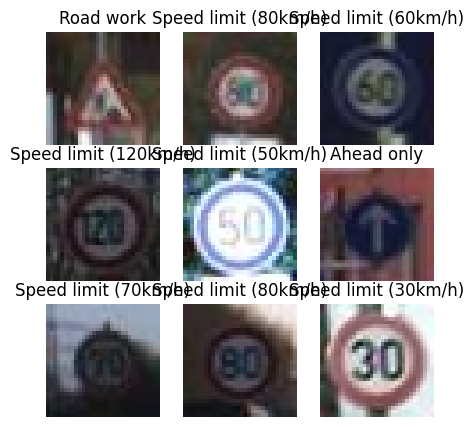

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Speed limit (50km/h)', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Speed limit (60km/h)', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Speed limit (70km/h)', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing']


In [30]:
#this function creates a dataset from images stored in a directory
from tensorflow.keras.preprocessing import image_dataset_from_directory

#Load the datasets

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,    #ensure consistent data splitting each time
    image_size=(32,32),
    batch_size=32

)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32,32),
    batch_size=64

)

#Map Class Numbers to class names

class_numbers = train_ds.class_names     #in here classs names are-> 0 t0 42
class_names = [labels_df['Name'][int(i)] for i in class_numbers]

#Visualize some training images with corresponding labels

plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):        #takes one batch(32 images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


print(class_names)



# **Step 3 - Data Augmentation**





In [19]:
#Apply data augmentation to our training dataset to improve the model's robustness by exposing it to a wider variety of image conditions.

# increase the diversity of the training data without actually collecting new data.

#It involves applying various transformations to the training images, such as rotations, translations, flips, zooms, and more, to create new variations of the existing images.




#Define the Data Augmentation Pipeline
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
# ])

from tensorflow.keras import layers

# Ensure TensorFlow version is 2.16.1
print("TensorFlow version:", tf.__version__)

# Data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])


#Apply the data Augmentation to the training dataset

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



TensorFlow version: 2.16.1


In [20]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


# **Step 4: Model Architecture**

In [21]:
#Building a CNN model using keras

from tensorflow.keras.models import Sequential   #Linear stack of layers which allows to build the model layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Rescaling,Input
from tensorflow.keras import mixed_precision

#Conv2D: This layer creates a convolution kernel that is convolved with the input layer to produce a tensor of outputs.
#MaxPooling2D: This layer performs max pooling operations, which reduce the spatial dimensions (height and width) of the input volume.
#Flatten: This layer flattens the input, converting it into a 1D array for the next fully connected layers.
#Dense: This is a fully connected layer.
#Dropout: This layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.
#Rescaling: This layer rescales the input values by a given factor, typically used to normalize the input data


#Enable Mixed Precision
mixed_precision.set_global_policy('mixed_float16')

#Mixed precision refers to using different numerical precisions in different parts of the model
#Float16 (16-bit half-precision): For most of the computations, such as forward and backward passes.
#Float32 (32-bit single-precision): For specific operations where higher precision is crucial, like maintaining the model’s weights.


model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,
    Rescaling(1./255),
    Conv2D(32, (3, 3), activation='relu'),  #First Conv Layer #32x32 pixels & 3 color channels         32-no of filters   (3,3)- size of the convol kernel
    MaxPooling2D(2,2),                      #First Pooling Layer                    #Reduces the spatial dimensions (height and width) of the input volume by a factor of 2.
    Conv2D(64, (3, 3), activation='relu'),  #Second Conv Layer
    MaxPooling2D(2,2),                      #Second Pooling layer
    Conv2D(128, (3, 3), activation='relu'), #Third Conv Layer
    MaxPooling2D(2,2),                      #Third Pooling layer
    Flatten(),
    Dense(64, activation='relu'),           #First Dense layer             #Fully connected layer with 64 units and ReLU activation.
    Dropout(0.2),      #Drops 20% of the units randomly to prevent overfitting.
    Dense(128, activation='relu'),          #Second Dense Layer
    Dense(len(class_names), activation='softmax',dtype='float32')  #output layer           Fully connected layer with a number of units equal to the number of classes (length of class_names) and softmax activation for multi-class classification.
])

print(len(class_names))
# model.build(input_shape=(32, 32, 3))
model.summary()          #a summary of the model architecture, showing the layers, their output shapes, and the number of parameters.


43


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,947 (546.67 KB)

 Trainable params: 139,947 (546.67 KB)

 Non-trainable params: 0 (0.00 B)

**Input Image** (e.g., 32x32x3)   #The input to the CNN, typically a 2D image with 3 color channels (RGB).
        |
        V
+-------------------+
| Convolutional Layer|          #Applies convolution operations to the input,
                                using filters/kernels to extract features from the input image
|  (Conv2D, 32 filters|
|   3x3, ReLU)       |
+-------------------+
        |
        V
+-------------------+
| Max Pooling Layer |           #Reduces the spatial dimensions (width and
                                 height) of the feature maps while retaining the most important features.
|  (MaxPooling2D,   |
|   2x2)            |
+-------------------+
        |
        V
+-------------------+
| Convolutional Layer|
|  (Conv2D, 64 filters|
|   3x3, ReLU)       |
+-------------------+
        |
        V
+-------------------+
| Max Pooling Layer |
|  (MaxPooling2D,   |
|   2x2)            |
+-------------------+
        |
        V
+-------------------+
| Convolutional Layer|
|  (Conv2D, 128 filters|
|   3x3, ReLU)       |
+-------------------+
        |
        V
+-------------------+
| Max Pooling Layer |
|  (MaxPooling2D,   |
|   2x2)            |
+-------------------+
        |
        V
+-------------------+
| Flatten Layer     |        #Flattens the 2D matrix data into a 1D vector,
                              preparing it for the fully connected dense layers.
+-------------------+
        |
        V
+-------------------+
| Dense Layer       |        #Fully connected layer that processes the  
                             flattened data to learn higher-level representations
|  (Dense, 64 units,|
|   ReLU)           |
+-------------------+
        |
        V
+-------------------+            # Randomly sets a fraction of input units to 0
                                   during training to prevent overfitting.
| Dropout Layer     |
|  (Dropout, 0.5)   |
+-------------------+
        |
        V
+-------------------+
| Dense Layer       |
|  (Dense, 128 units|
|   ReLU)           |
+-------------------+
        |
        V
+-------------------+
| Output Layer      |          #The final dense layer with softmax activation
                                 for multi-class classification, providing class probabilities.
|  (Dense, softmax) |
+-------------------+
        |
        V
  Class Predictions


# Step 5 : Compile and Train the Model

In [22]:
#Model Compilation

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Define callbacks
# Set callback functions to early stop training
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

#EarlyStopping: Monitors the validation loss (val_loss) and stops training if it doesn't improve for 3 consecutive epochs (patience=3).
#ModelCheckpoint: Saves the model to the file best_model.h5 whenever the validation loss improves. The save_best_only=True argument ensures that only the best model (with the lowest validation loss) is saved.

#Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)




Epoch 1/50
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.1369 - loss: 3.1514
Epoch 1: val_loss improved from inf to 1.69288, saving model to best_model.keras
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 1627s 888ms/step - accuracy: 0.1370 - loss: 3.1511 - val_accuracy: 0.4529 - val_loss: 1.6929
Epoch 2/50
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.4687 - loss: 1.6393
Epoch 2: val_loss improved from 1.69288 to 1.25893, saving model to best_model.keras
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 938s 513ms/step - accuracy: 0.4687 - loss: 1.6393 - val_accuracy: 0.5787 - val_loss: 1.2589
Epoch 3/50
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5510 - loss: 1.3186
Epoch 3: val_loss improved from 1.25893 to 0.97101, saving model to best_model.keras
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 884s 483ms/step - accuracy: 0.5510 - loss: 1.3186 - val_accuracy: 0.6568 - val_loss: 0.9710
Epoch 4/50
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.6165 - loss: 1.1242
Epoch 4: val_loss d

# Step 6: Model Evaluation

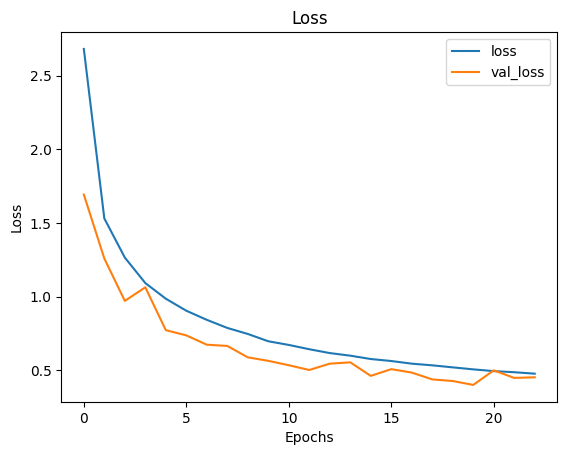

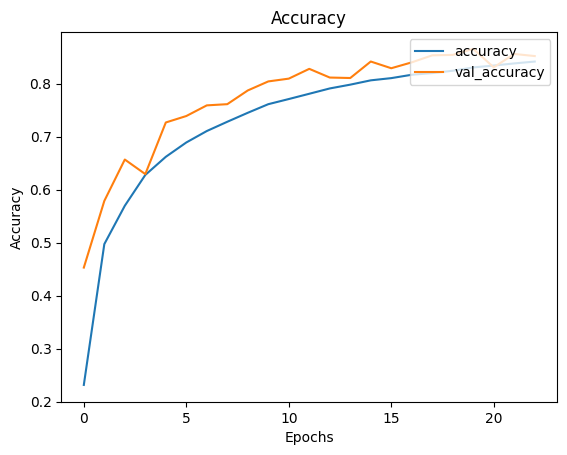

229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8472 - loss: 0.4598
Validation accuracy: 0.8520544171333313


In [23]:
#After training, evaluate the model's performance and visualize the training process.

# Plot the training history
# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#Evaluate the model on validation data

val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {val_accuracy}')



In [32]:
import tensorflow as tf

# Load the class names from labels.csv
labels_path = 'D://drive/Training Data/labels.csv'  # Update this path
labels_df = pd.read_csv(labels_path)
class_names = labels_df['Name'].tolist()


#Load the Saved Model
model_path = 'C://Users/hp/Downloads/best_model.keras'  # Update this path to the actual location of best_model.keras
model = tf.keras.models.load_model(model_path)

# Check if the model is loaded correctly
model.summary()

# Ensure class names are correctly defined
print("Class names:", class_names)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,847 (1.60 MB)

 Trainable params: 139,947 (546.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,900 (1.07 MB)

Class names: ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric t

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define helper function to preprocess the image
def load_and_preprocess_image(img_path, img_size=(32, 32)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale to match the Rescaling layer in the model
    return img_array

# Define function to predict the class of an image
def predict_image(model, img_path, class_names):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class[0]]
    return predicted_class_name

# Example usage
img_paths = ['D://drive/eval/slippery.jpg', # Path to the new image you want to predict
             'D://drive/eval/stop.png'
             ]  

# Check predictions for the provided paths
results = {}
for img_path in img_paths:
    try:
        predicted_class_name = predict_image(model, img_path, class_names)
        results[img_path] = predicted_class_name
    except Exception as e:
        results[img_path] = str(e)

print(results)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
{'D://drive/eval/slippery.jpg': 'Road work', 'D://drive/eval/stop.png': 'End of all speed and passing limits'}
